## Sliding Window Smoothers

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y

In [214]:
class SW(BaseEstimator, RegressorMixin):
    def __init__(self, bandwidth=0.1):
        setattr(self, "bandwidth", bandwidth)
    
    def fit(self, X, y):
        setattr(self, "_X", X)
        setattr(self, "_y", y)
        return self
        
    def predict(self, X):
        I = np.abs(np.reshape(self._X, (-1,1)) - np.reshape(X, (1,-1))) < self.bandwidth
        y_pred = np.sum(self._y.reshape(-1, 1)*I, axis=0)/np.sum(I, axis=0)
        return y_pred

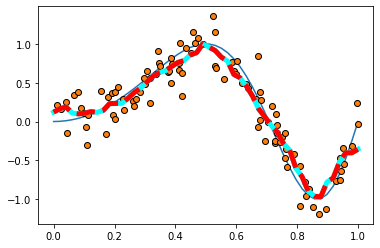

In [224]:
np.random.seed(668)
n = 100

def y_true(x):
    return np.sin(x*(2*np.pi*x))

t = np.linspace(0, 1)
plt.plot(t, y_true(t))

_X = np.random.uniform(size=n)
_X.sort()
_y = y_true(_X) + np.random.normal(0, 0.2, size=n)
plt.plot(_X, _y, 'o', mec='k')

bandwidth=0.06
M = SW(bandwidth=bandwidth)
M.fit(_X.reshape(-1, 1), _y)
y_pred = M.predict(t.reshape(-1, 1))
plt.plot(t, y_pred, '-', lw=5, color="cyan")

y_check = RadiusNeighborsRegressor(radius=bandwidth).fit(_X.reshape(-1, 1), _y).predict(t.reshape(-1, 1))
plt.plot(t, y_check, '--', lw=5, color="red");